In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_data = pd.read_csv("SalaryData_Train(1).csv")
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test_data = pd.read_csv("SalaryData_Test(1).csv")

In [7]:
train_data.shape

(30161, 14)

In [8]:
test_data.shape

(15060, 14)

In [9]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
mapping = {' >50K': 1, ' <=50K': 2}
train1 = train_data.replace({'Salary': mapping})
test1 = test_data.replace({'Salary': mapping})

In [12]:
df = train1.append(test1)
df1 = df.copy()
df1.shape

(45221, 14)

In [13]:
corr = df1.corr()

<AxesSubplot:>

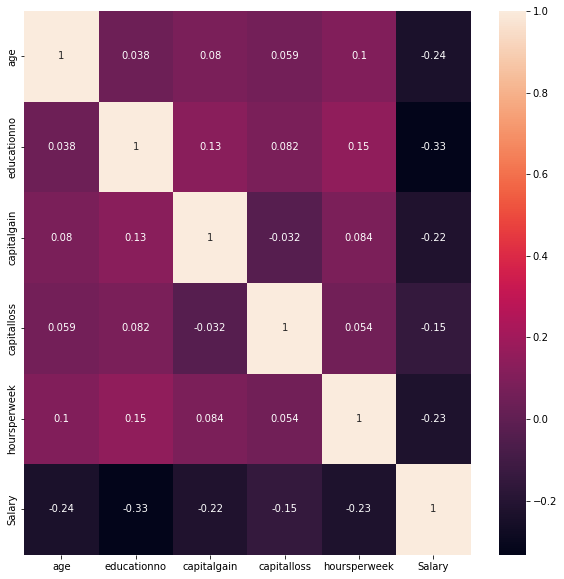

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

Skew: -0.31062061074424
Kurtosis: 0.6350448194491634


ValueError: cannot reindex from a duplicate axis

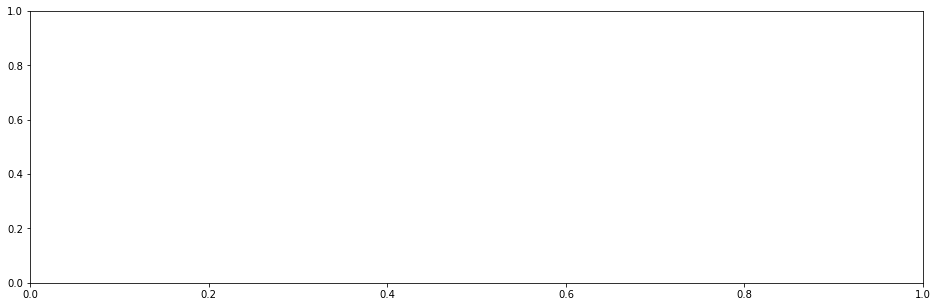

In [15]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['educationno'].skew()))
print("Kurtosis: {}".format(df1['educationno'].kurtosis()))
ax = sns.kdeplot(df1['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [ ]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()

In [ ]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df = train_data.columns

In [ ]:
df = df.drop(["age","educationno","capitalgain","capitalloss","hoursperweek","Salary"])

In [ ]:
df

In [ ]:
for i in df:
    train_data[i] = le.fit_transform(train_data[i])

In [ ]:
train_data

In [ ]:
x_train = train_data.drop(['Salary'],axis=1)
y_train = train_data['Salary']

In [ ]:
for i in df:
    test_data[i] = le.fit_transform(test_data[i])

In [ ]:
test_data

In [ ]:
x_test = test_data.drop(['Salary'],axis=1)
y_test = test_data['Salary']

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='rbf')

In [ ]:
model.fit(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
model1 = SVC(kernel='poly')
model1.fit(x_train,y_train)
model1.score(x_test,y_test) 

In [ ]:
model2 = SVC(kernel='linear')
model2.fit(x_train,y_train)
model2.score(x_test,y_test)